<a href="https://www.kaggle.com/code/hordia/regresi-n-log-stica-con-keras?scriptVersionId=140340978" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [3]:
folder = '/kaggle/input/fashion-mnist-itba-lab-2020/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [5]:
len(x_train)

54000

In [6]:
max_value = np.max(x_train)
print(max_value)
max_value = np.max(x_valid)
print(max_value)

255
255


In [7]:
#normalizo
x_train = x_train/255.
x_valid = x_valid/255.

In [8]:
x_train[0].shape

(28, 28)

In [9]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

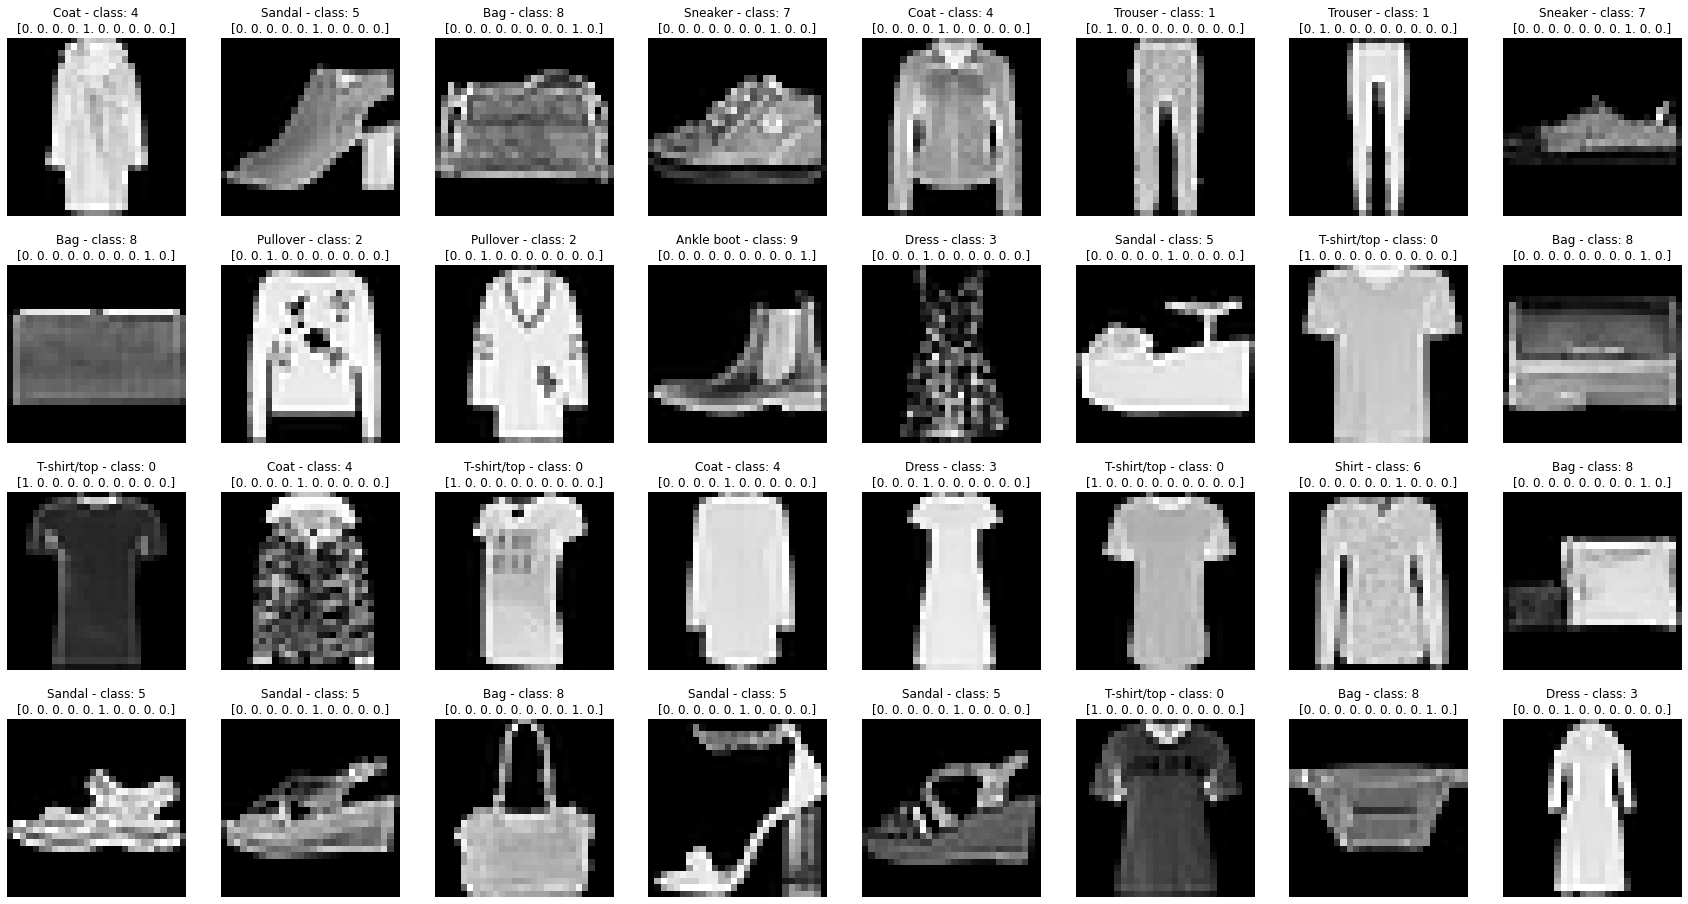

In [10]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [11]:
from tensorflow.keras.layers import LeakyReLU
from keras.layers import Dropout, Dense, Conv2D, MaxPooling2D

In [12]:
print(x_train.shape[1:])

(28, 28)


In [13]:
print(x_train.shape)

(54000, 28, 28)


In [14]:
#x_train = np.expand_dims(x_train, axis=0)
#print(x_train.shape)

In [15]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))

#model_single_layer.add(Conv2D(32, (3, 3), input_shape=(54000, 28, 28), activation='relu'))
#model_single_layer.add(MaxPooling2D(pool_size=(2, 2)))


model_single_layer.add(Dense(units=128, activation='relu'))
model_single_layer.add(Dropout(0.5))
model_single_layer.add(Dense(units=64, activation='relu'))
#model_single_layer.add(LeakyReLU(alpha=0.1))
model_single_layer.add(Dropout(0.2))

#model_single_layer.add(Flatten())

model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
Salida (Dense)               (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

In [16]:
#lr = 0.000001
lr = 0.0001
#SGD = optimizers.sgd(lr=lr)
ADAM = optimizers.Adam(lr=lr)
#model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])

In [17]:
%%skip
from sklearn.model_selection import train_test_split, KFold


# Define the number of folds (K)
num_folds = 5

# Initialize a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_accuracies = []

#batch_size = 512
batch_size = 128
#num_of_epochs = 20
num_of_epochs = 200

# Iterate through each fold
for fold, (train_index, valid_index) in enumerate(kf.split(x)):
    x_train_fold, x_valid_fold = x[train_index], x[valid_index]
    y_train_fold_categorical, y_valid_fold_categorical = y[train_index], y[valid_index]
    
    model_single_layer.fit(x_train_fold, 
                       y_train_fold_categorical,
                       epochs=num_of_epochs, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid_fold, y_valid_fold_categorical)
                      )
    
    
    
    # Make predictions on the validation data
    y_pred = model.predict(x_valid_fold)
    
    print(model_single_layer.score(x_valid_fold,y_valid_fold_categorical))
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_valid_fold, y_pred)
    fold_accuracies.append(accuracy)
    
    print(f"Fold {fold+1} Accuracy: {accuracy}")

# Calculate and print the average accuracy across all folds
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"Average Accuracy: {average_accuracy}")


UsageError: Cell magic `%%skip` not found.


In [ ]:
#batch_size = 512
batch_size = 128
#num_of_epochs = 20
num_of_epochs = 200
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=num_of_epochs, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [ ]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

In [ ]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

In [ ]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

# Armo CSV para submitear

In [ ]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')